In [1]:
import numpy as np
import os
from os import listdir
from pathlib import Path
import keras.utils as image
import glob
from keras.utils import np_utils

In [2]:
folder_dir=r"C:\Users\91893\machine learning\Image Classification\images"
p=Path(folder_dir)
dirs=p.glob("*")
labels_dict={"cat":0,"horse":1,"human":2}
 
image_data=[]
labels=[]
for folder_name in dirs:
    label=str(folder_name).split("\\")[-1][:-1]
    
    for img_path in folder_name.glob("*.jpg"):
        img=image.load_img(img_path,target_size=(224,224))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
    
    for img_path in folder_name.glob("*.png"):
        img=image.load_img(img_path,target_size=(224,224))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])

In [3]:
#convert data 
image_data=np.array(image_data,dtype='float32')/255.0
labels=np.array(labels)

X=np.array(image_data)
Y=np.array(labels)

from sklearn.utils import shuffle
X,Y=shuffle(X,Y,random_state=2)

In [4]:
Y=np_utils.to_categorical(Y)

In [5]:
from keras.applications import ResNet50
import keras.utils as image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import numpy as np
from keras.optimizers import Adam
from keras.layers import *
from keras.models import Model
import matplotlib.pyplot as plt

In [6]:
model=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [7]:
#include top means u dont want the classifier
#weights has been set to imagenet means it is used pretrained values
#if you want to train the same model from starting set it to none

In [8]:
#model.summary()

In [18]:
#making the classifier
avl=GlobalAveragePooling2D()(model.output)
fc1=Dense(256,activation='relu')(avl)
d1=Dropout(0.5)(fc1)
fc2=Dense(3,activation='softmax')(d1)

In [19]:
model_new=Model(inputs=model.input,outputs=fc2)
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [20]:
adam=Adam(learning_rate=0.0003)
model_new.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [21]:
for i in range(len(model_new.layers)):
    pass
    #print(i,model_new.layers[i])

In [22]:
#now till 174 is Resnet50 so lets fine tune layers from 169

In [23]:
for i in range(169):
    model_new.layers[i].trainable=False

In [24]:
model_new.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [28]:
hist=model_new.fit(X,Y,shuffle=True,batch_size=16,epochs=12,validation_split=0.2)

Epoch 1/6
69/69 [==============================] - 78s 1s/step - loss: 0.3760 - accuracy: 0.8453 - val_loss: 0.3714 - val_accuracy: 0.8400
Epoch 2/6
69/69 [==============================] - 79s 1s/step - loss: 0.3773 - accuracy: 0.8581 - val_loss: 0.3797 - val_accuracy: 0.8400
Epoch 3/6
69/69 [==============================] - 77s 1s/step - loss: 0.3297 - accuracy: 0.8635 - val_loss: 0.3605 - val_accuracy: 0.8509
Epoch 4/6
69/69 [==============================] - 78s 1s/step - loss: 0.2930 - accuracy: 0.8872 - val_loss: 0.3164 - val_accuracy: 0.8691
Epoch 5/6
69/69 [==============================] - 80s 1s/step - loss: 0.2683 - accuracy: 0.8917 - val_loss: 0.6051 - val_accuracy: 0.7600
Epoch 6/6
69/69 [==============================] - 78s 1s/step - loss: 0.3139 - accuracy: 0.8726 - val_loss: 0.4207 - val_accuracy: 0.8364


In [29]:
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']

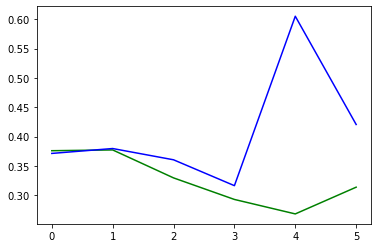

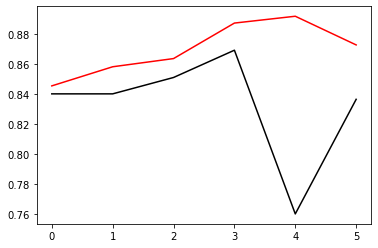

In [30]:
plt.figure(0)
plt.plot(loss,'g')
plt.plot(val_loss,'b')
plt.show()

plt.plot(acc,'r')
plt.plot(val_acc,'black')
plt.show()

In [ ]:
#90% accuracy almost